# SRD Semestr letni 2022/23 Zaliczenie ćwiczeń

Czas trwania kolokwium: 1.5h

Wypełniony notebook z numerem indeksu w nazwie pliku proszę wysyłać na lkrain@sgh.waw.pl.

## Import bibliotek

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import random
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import umap
import seaborn as sns
from scipy import stats
from sklearn import tree
from matplotlib.pyplot import figure

## Zadanie 1 (20p)

**(1p)** Załaduj dane z adresu http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric do DataFrame. Dane nie mają nagłówka. Użyj adresu URL w wywołaniu funkcji, a nie lokalnego pliku.

In [105]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
dataset = pd.read_fwf(url, header = None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


**(2p)** Zmień nazwę ostatniej kolumny na `target`. Kolumna informuje o niespłacaniu kredytu przez klienta - 2 => klient nie spłaca kredytu, 1=> klient spłaca kredyt. Przekoduj `target` tak, aby klienci nie spłacający kredytu byli oznaczeni jako 1 i 0 w przeciwnym przypadku.

In [106]:
dataset.rename(columns = {24: "target"}, inplace=True)
dataset['target'] = dataset['target'] - 1 #recoding target variable
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,0
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,1
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,0
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,0
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,1


**(2p)** Sprawdź liczebności wartości zmiennej `target`. W jaki sposób można rozwiązać problem niezbilansowanych danych? Podaj co najmniej 3 sposoby.

In [107]:
dataset['target'].value_counts()

0    700
1    300
Name: target, dtype: int64

Problem niezbilansowanych danych można rozwiązać np. za pomocą następujących technik:
- wykonać tzw. undersampling, tzn. pozbyć się pewnej ilości wierszy z grupy liczniejszej, 
- wykonać tzw. oversampling, czyli dodać wiersze obiektów należących do klasy liczniejszej
- skorzystać z podejść alogrytmicznych,  takich jak np. SMOTE (Synthetic Minority Oversampling Technique)


**(1p)** Podziel dane na zbiór treningowy **(85%)** i walidacyjny **(15%)** z ziarnem losowości **32**. Zmienną celu jest `target`, wszystkie pozostałe zmienne są predyktorami.

In [108]:
X = dataset.drop(['target'], axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 32)

**(2p)** Wytrenuj regresję logistyczną `sklearn.linear_model.LogisticRegression`. Ustaw do 1000 iteracji uczenia i upewnij się, że model **nie jest** regularyzowany. Ile współczynników różnych od 0 występuje w zbudowanym modelu?

In [109]:
model = LogisticRegression(max_iter=10000, penalty = 'none')
LR= model.fit(X_train,y_train) # uczymy model 

In [110]:
LR.coef_ # wszystkie współczynniki modelu są różne od zera

array([[-0.55380207,  0.03464075, -0.36429401,  0.00637262, -0.25826321,
        -0.1420191 , -0.23635834, -0.01141339,  0.10010092, -0.01073023,
        -0.29841243,  0.21067394, -0.06834109, -0.45728528, -1.36234324,
         0.65945865, -0.95902404,  0.91294981,  1.17249048, -0.07287905,
        -0.50433826, -0.77129201, -0.18705879, -0.17824224]])

In [111]:
LR.coef_.size # jest ich 24

24

**(2p)** Przeprowadź selekcję zmiennych (zbuduj nowy model `sklearn.linear_model.LogisticRegression`) poprzez ustawienie odpowiedniego typu regularyzacji. Ustaw ziarno losowości na **11** i ustaw parametr określający siłę regularyzacji na **0.5**. Ile współczynników modelu jest równych 0? 

In [117]:
model1 = LogisticRegression(penalty = 'l1' ,random_state = 11, C = 0.5)
LR_L1 = model2.fit(X_train,y_train)

In [118]:
LR_L1.coef_ # wciąż mamy 0 zerowych współczynników

array([[-0.53871456,  0.0344134 , -0.35286477,  0.00605963, -0.2565542 ,
        -0.13482046, -0.22951285, -0.00811286,  0.12764252, -0.01076253,
        -0.27592644,  0.18808863, -0.07440942, -0.37611453, -0.80200197,
         0.59987634, -0.77788305,  0.55000453,  0.58151559,  0.00322426,
        -0.3958266 , -0.35592789, -0.1002044 , -0.10150187]])


**(2p)** Określ jak regularyzacja **Elastic net** łączy się z regularyzacją **L1** i **L2**.

Regularyzacja Elastic net to połączenie regularyzacji L1 i L2, tzn. na model nakładamy zarówno ograniczenie nakładane w przypadku L1, jak i L2.

**(5p)** Używając modelu po selekcji zmiennych, przeprowadź **kosztową optymalizację progu odcięcia** z kosztem False Positive równym **2** i kosztem False Negative równym **5**. Wyznacz i podaj optymalną wartość progu odcięcia (sprawdź progi odcięcia od 0 do 1 z krokiem 0.01).

In [122]:
def cutoff_analysis(y_test: pd.Series, y_test_hat: pd.Series, cost_matrix: np.array = np.array([[0,2],[5,0]]) ) -> list:
    """
    Calculate accuracy vector for cutoff thresholds between 0 and 1 for given true labels `y_test` 
    and predicted labels `y_test_hat`. If `cost_matrix` is specified, calculates cost vector instead.
    """
    cutoff_range = np.arange(0, 1.0, 0.01)
    vec = []
    
    for cutoff in cutoff_range:
        y_test_hat_bin = np.where(y_test_hat >= cutoff, 1, 0)
        conf_mat = confusion_matrix(y_test, y_test_hat_bin)
        #no cost matrix, calculate accuracy
        if np.sum(cost_matrix) == 0:
            vec.append(np.sum(np.diag(conf_mat)) / np.sum(conf_mat))
        else:
            conf_const_mat = np.multiply(conf_mat, cost_matrix)
            vec.append(conf_const_mat.sum() / len(y_test))
    return vec

In [123]:
score_val = LR_L1.predict_proba(X_test)[:,1]
score_train = LR_L1.predict_proba(X_train)[:,1]

In [124]:
costmat = np.array([[0,2],[5,0]])
cost_val = cutoff_analysis(y_test, score_val, cost_matrix = costmat) 
cost_train = cutoff_analysis(y_train, score_train, cost_matrix = costmat)

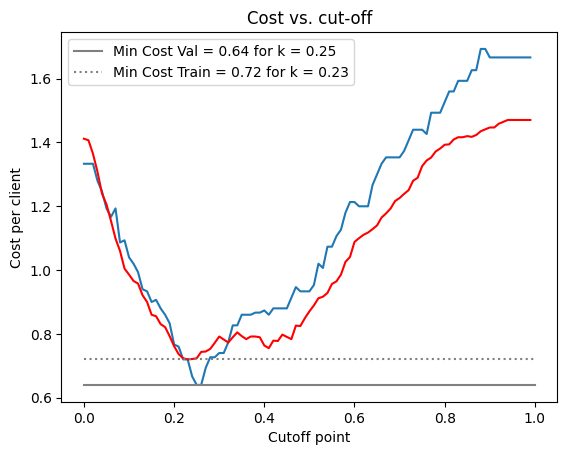

In [125]:
plt.figure()
plt.xlabel("Cutoff point")
plt.ylabel("Cost per client")
plt.title("Cost vs. cut-off")

plt.plot(np.arange(0, 1.0, 0.01), cost_val)
plt.plot(np.arange(0, 1.0, 0.01), cost_train, color = "red")
plt.plot([0, 1], [min(cost_val), min(cost_val)], color = 'gray', label = "Min Cost Val = " + \
         str(round(min(cost_val),3)) + " for k = " + str(round(np.arange(0, 1.0, 0.01)[cost_val.index(min(cost_val))],2)))
plt.plot([0, 1], [min(cost_train), min(cost_train)], color = 'gray', linestyle = ":", label = "Min Cost Train = " + \
         str(round(min(cost_train),3)) + " for k = " + str(np.arange(0, 1.0, 0.01)[cost_train.index(min(cost_train))]))

plt.legend();

A zatem optymalna wartość progu odcięcia to 0.25 (funkcja kosztu przyjmuje wtedy wartość najmniejszą na zbiorze walidacyjnym )

**(3p)** Dana jest następująca macierz trafności:

Wartości predykcji są w kolumnach, wartości rzeczywiste w wierszach.

| A\P | 1   | 0   |
|-----|-----|-----|
| 1   | 123 | 321 |
| 0   | 324 | 456 |

Policz:
* Accuracy
* Precision
* Recall
* F1-score

In [27]:
TP = 123
FP = 321
TN = 456
FN = 324

ACC = (TP + TN)/(TP + FP + TN + FN) 
PREC = TP / (TP + FP) 
REC = TP / (TP + FN)
F1 = 2*PREC*REC/(PREC+REC)
print("ACCURACY ",ACC,"\nPRECISION ",PREC,"\nRECALL ",REC,"\nF1 score",F1)

ACCURACY  0.4730392156862745 
PRECISION  0.27702702702702703 
RECALL  0.2751677852348993 
F1 score 0.27609427609427606


## Zadanie 2 (13p)

**(1p)** Załaduj dane z adresu https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv do DataFrame. Użyj adresu URL w wywołaniu funkcji, a nie lokalnego pliku.

In [68]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
dataset2 = pd.read_csv(url, sep = ",", header = 0)
dataset2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**(1p)** Odejmij 1 od kolumny `Channel` i zapisz ją jako kolumnę `channel`. Usuń kolumny `Region` i `Channel` ze zbioru.

In [69]:
dataset2['channel'] = dataset2['Channel']-1
dataset2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,channel
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


In [70]:
dataset2 = dataset2.drop(['Region', 'Channel'], axis =1)
dataset2.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,channel
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,1


**(1p)** Wystandaryzuj dane używając `sklearn.preprocessing.StandardScaler`.

In [71]:
dataset2 = pd.DataFrame(StandardScaler().fit(dataset2).transform(dataset2))
dataset2.head()

,0,1,2,3,4,5,6
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1.448652
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1.448652
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1.448652
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.690297
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1.448652


**(2p)** Wygeneruj 2-wymiarowe osadzenie PCA na przeskalowanych danych.

In [75]:
pca = PCA(2)
pca_embedding = pca.fit_transform(dataset2)
print(pca_embedding.shape)

(440, 2)


**(3p)** Przedstaw wygenerowane dane na wykresie rozrzutu i pokoloruj punkty zgodnie z wartościami zmiennej `channel`. Skomentuj jakość osadzenia na podstawie separacji wartości zmiennej `channel` w dwuwymiarowej przestrzeni.

In [62]:
def plot_reduced_data(embedding, color_col):
    plt.figure(dpi=150)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap='rainbow', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    n = len(np.unique(color_col))
    plt.colorbar(boundaries=np.arange(n+1)-0.5).set_ticks(np.arange(n)) 

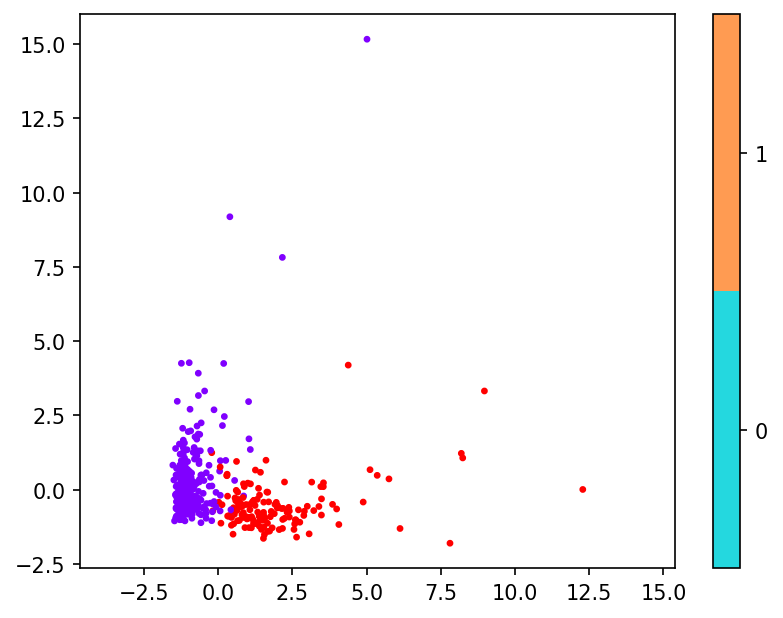

In [78]:
plot_reduced_data(pca_embedding, dataset2[6])

**(3p)** Wygeneruj dwuwymiarowe osadzenie inną techniką redukcji wymiarowości (UMAP, t-SNE, MDS, itd.) i stwórz analogiczny wykres jak w punkcie poprzednim. Oceń jakość osadzenia w porównaniu do osadzenia wyprodukowanego przez PCA.

In [79]:
model3 = umap.UMAP(random_state=42)
model3.fit(dataset2)
umap_embedding = model3.transform(dataset2)
umap_embedding.shape

(440, 2)

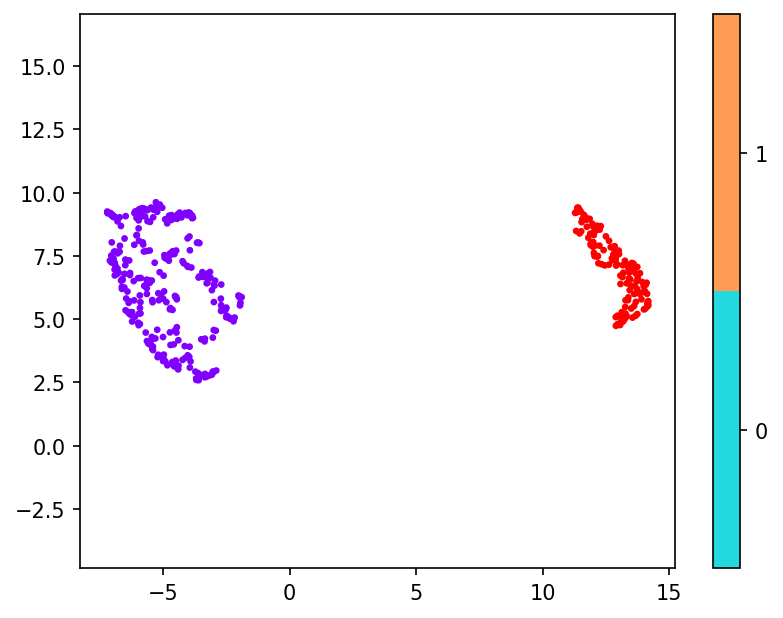

In [80]:
plot_reduced_data(umap_embedding, dataset2[6])

**(2p)** Wyjaśnij jaki jest cel nienadzorowanego klastrowania i podaj przykładowy use case klastrowania. Dodatkowo odpowiedz na pytania: 
* W jaki sposób dobiera się liczbę klastrów jeśli prawdziwe etykiety grup nie są dostępne (podaj jedną metodę)? 
* W jaki sposób ocenia się jakość klastrowania jeśli prawdziwe etykiety grup są dostępne (podaj jedną metrykę)?

Celem nienadzorowanego klastrowania jest wyróżnienie grup wśród danych, bazując na odległościach poszczególnych obserwacji od siebie.

## Zadanie 3 (17p)

**(1p)** Załaduj dane z adresu https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv do DataFrame. Użyj adresu URL w wywołaniu funkcji, a nie lokalnego pliku.

In [95]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv "
dataset3 = pd.read_csv(url, sep = ";", header = 0)
dataset3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**(1p)** Sprawdź czy w zbiorze występują braki danych.

In [96]:
dataset3.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Zatem w zbiorze nie ma brakujących danych

**(2p)** Stwórz wykres rozrzutu z przedstawionym oszacowaniem regresji liniowej. Użyj zmiennych:
* oś y - `alcohol`
* oś x - `residual sugar`

<AxesSubplot:xlabel='residual sugar', ylabel='alcohol'>

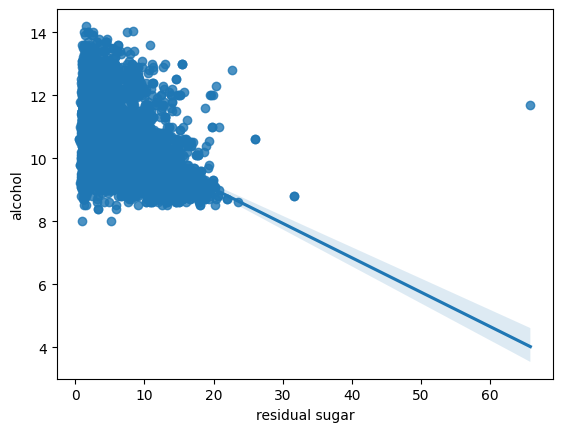

In [97]:
plt.tight_layout(pad = 0.4, w_pad = 1.0, h_pad = 1.0)
sns.regplot(x = 'residual sugar', y = "alcohol", data = dataset3)

**(2p)** Wykres wskazuje na występowanie obserwacji odstających. Usuń obserwacje odstające za pomocą metody z-score. Policz z-score dla wszystkich kolumn w zbiorze i usuń obserwacje, gdzie dowolna zmienna przyjmuje wartość większą niż **4** odchylenia standardowe od średniej. Wygeneruj ponownie wykres z poprzedniego punktu, aby potwierdzić usunięcie obserwacji odstających.

In [98]:
stats.zscore(dataset3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.137870
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.137870
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.137870
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.137870
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.137870
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,0.137870
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,-0.991374
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,0.137870
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,1.267114


In [99]:

#Removing outliers
dataset3 = dataset3[(np.abs(stats.zscore(dataset3)) <4).all(axis = 1)]
dataset3.shape


(4739, 12)

<AxesSubplot:xlabel='residual sugar', ylabel='alcohol'>

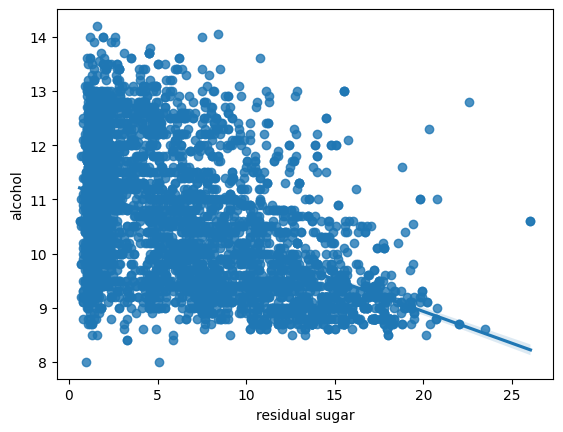

In [100]:
plt.tight_layout(pad = 0.4, w_pad = 1.0, h_pad = 1.0)
sns.regplot(x = 'residual sugar', y = "alcohol", data = dataset3)

**(1p)** Podziel dane na zbiór treningowy **(85%)** i walidacyjny **(15%)** z ziarnem losowości **42**. Zmienną celu jest `alcohol`, wszystkie pozostałe zmienne są predyktorami.

In [101]:
X = dataset3.drop(['alcohol'], axis=1)
y = dataset3['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

**(1p)** Zbuduj model `sklearn.tree.DecisionTreeRegressor` z parametrem `random_state` równym **42** i parametrem kosztu równym **0**.

In [104]:
CART = tree.DecisionTreeRegressor(random_state = 42, ccp_alpha = 0.0)
CART_model = CART.fit(X_train, y_train)

**(2p)** Co oznacza **przycinanie** drzewa CART? Dlaczego i jak wykonywane jest przycinanie drzewa? 

**(2p)** Wytrenuj model `sklearn.ensemble.RandomForestRegressor`. Zoptymalizuj hiperparametr określający liczbę zmiennych użytych do budowy pojedynczego drzewa (sprawdź wartości 1, 2, ..., 11) - użyj RMSE jako metryki decyzyjnej. Dla każdego stworzonego modelu użyj ziarna losowości **10**. 

**(2p)** Które 2 zmienne są najbardziej istotne w wyjaśnianiu wariancji zmiennej `alcohol`? Podaj ich nazwy. Stwórz wykres słupkowy 5 najbardziej istotnych zmiennych.

**(2p)** Wytrenuj model `sklearn.ensemble.GradientBoostingRegressor`. Zoptymalizuj hiperparametr określający liczbę iteracji uczenia (sprawdź wartości 10, 50, 100, 200, 300, 400) - użyj RMSE jako metryki decyzyjnej. Dla każdego stworzonego modelu użyj ziarna losowości **10**. 

**(1p)** Porównaj jakość 3 stworzonych modeli (CART, Random Forest, Gradient Boosted Trees) poprzez pomiar RMSE (na zbiorze walidacyjnym) i przedstaw błędy na wykresie słupkowym. Który model jest najlepszy pod kątem RMSE?